In [5]:
import numpy as np

def regularity_fourier(h, alpha=1):
    """
    Calcule la régularité d'un filtre 2D h[n,m] via sa transformée de Fourier.
    
    Arguments :
    - h : numpy array 2D, filtre
    - alpha : puissance pour pondérer les hautes fréquences (plus alpha grand = plus sensible aux hautes fréquences)
    
    Retour :
    - régularité : nombre réel, plus petit = filtre plus régulier
    """
    # Transformée de Fourier 2D
    H = np.fft.fft2(h)
    H = np.fft.fftshift(H)  # recentrer les basses fréquences au centre
    
    # Grille des fréquences normalisées
    n, m = h.shape
    u = np.fft.fftshift(np.fft.fftfreq(n))
    v = np.fft.fftshift(np.fft.fftfreq(m))
    U, V = np.meshgrid(u, v, indexing='ij')
    
    # Pondération par la fréquence
    freq_weight = (U**2 + V**2)**(alpha/2)
    
    # Calcul de l'énergie pondérée
    reg = np.sum(freq_weight * np.abs(H)**2)
    return reg

# Exemple d'utilisation
if __name__ == "__main__":
    # Filtre aléatoire 5x5
    h = [[ 0.02439906, -0.14774486, -0.26901716, -0.08239703, -0.02134323],
       [-0.06463236, -0.19133082, -0.12083958,  0.05277538,  0.0563964 ],
       [ 0.0339999 , -0.11513419, -0.18441156, -0.13106574, -0.08351411],
       [ 0.16250205,  0.02085505, -0.0163816 ,  0.09919927,  0.09063622],
       [-0.11129033, -0.21099295, -0.09787389, -0.01417794, -0.02989437]]
    h = np.array(h)
    
    reg = regularity_fourier(h, alpha=1)
    print("Régularité du filtre :", reg)





Régularité du filtre : 2.12461078957027


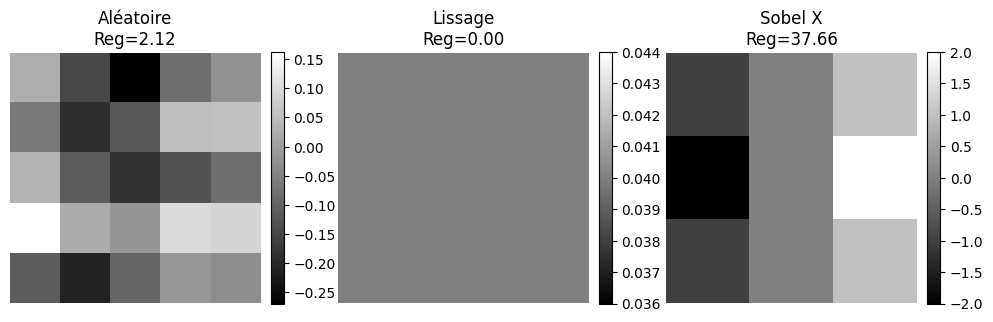

In [1]:
import numpy as np
import matplotlib.pyplot as plt
h = [[ 0.02439906, -0.14774486, -0.26901716, -0.08239703, -0.02134323],
       [-0.06463236, -0.19133082, -0.12083958,  0.05277538,  0.0563964 ],
       [ 0.0339999 , -0.11513419, -0.18441156, -0.13106574, -0.08351411],
       [ 0.16250205,  0.02085505, -0.0163816 ,  0.09919927,  0.09063622],
       [-0.11129033, -0.21099295, -0.09787389, -0.01417794, -0.02989437]]
h = np.array(h)
def regularity_fourier(h, alpha=1):
    """
    Calcule la régularité d'un filtre 2D h[n,m] via sa transformée de Fourier.
    """
    H = np.fft.fft2(h)
    H = np.fft.fftshift(H)  # recentrer les basses fréquences
    
    n, m = h.shape
    u = np.fft.fftshift(np.fft.fftfreq(n))
    v = np.fft.fftshift(np.fft.fftfreq(m))
    U, V = np.meshgrid(u, v, indexing='ij')
    
    freq_weight = (U**2 + V**2)**(alpha/2)
    reg = np.sum(freq_weight * np.abs(H)**2)
    return reg

# Création de filtres d'exemple
filters = {
    "Aléatoire": h,
    "Lissage": np.ones((5,5)) / 25,
    "Sobel X": np.array([[-1,0,1],[-2,0,2],[-1,0,1]]),
}

# Calcul des régularités
regularities = {name: regularity_fourier(h) for name, h in filters.items()}

# Affichage
fig, axes = plt.subplots(1, len(filters), figsize=(12,4))
for ax, (name, h) in zip(axes, filters.items()):
    im = ax.imshow(h, cmap='gray', interpolation='nearest')
    ax.set_title(f"{name}\nReg={regularities[name]:.2f}")
    ax.axis('off')
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def local_regularity_fourier_3D(h, block_size=(3,3), alpha=2):
    """
    Calcule la régularité locale de sous-blocs d'un filtre 2D
    et prépare une carte de régularité pour visualisation 3D.

    Arguments :
    - h : filtre 2D (numpy array)
    - block_size : tuple (hauteur, largeur) du sous-bloc
    - alpha : puissance pour pondérer les hautes fréquences

    Retour :
    - reg_map : matrice de régularité des sous-blocs
    """
    n, m = h.shape
    bh, bw = block_size
    reg_map = np.zeros((n - bh + 1, m - bw + 1))
    
    for i in range(n - bh + 1):
        for j in range(m - bw + 1):
            block = h[i:i+bh, j:j+bw]
            H = np.fft.fft2(block)
            H = np.fft.fftshift(H)
            
            # grille des fréquences
            u = np.fft.fftshift(np.fft.fftfreq(bh))
            v = np.fft.fftshift(np.fft.fftfreq(bw))
            U, V = np.meshgrid(u, v, indexing='ij')
            
            freq_weight = (U**2 + V**2)**(alpha/2)
            reg_map[i,j] = np.sum(freq_weight * np.abs(H)**2)
    
    return reg_map

# Exemple d'utilisation
h = Zsmooth  # filtre 2D que tu veux analyser
block_size = (3,3)
alpha = 2

reg_map = local_regularity_fourier_3D(Zsmooth, block_size=block_size, alpha=alpha)

# Affichage 3D
X, Y = np.meshgrid(np.arange(reg_map.shape[1]), np.arange(reg_map.shape[0]))
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, reg_map, cmap='viridis')
ax.set_xlabel('Indice colonne')
ax.set_ylabel('Indice ligne')
ax.set_zlabel('Régularité')
ax.set_title("Régularité locale du filtre (3D)")
plt.show()

# Trouver les sous-blocs les plus réguliers
min_reg = np.min(reg_map)
pos = np.argwhere(reg_map == min_reg)
print("Sous-blocs les plus réguliers (indices) :", pos)
Zcut, _, mask = plot_conv_surface_with_graphcut(model[0], filter_index=2, channel_index=0, smooth_factor=60, percentile=60)

NameError: name 'Zsmooth' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def local_regularity_fourier(h, block_size=(1,1), alpha=2):
    """
    Calcule la régularité locale de sous-blocs d'un filtre 2D.
    
    Arguments :
    - h : filtre 2D
    - block_size : taille des sous-blocs (hauteur, largeur)
    - alpha : puissance pour pondérer les hautes fréquences
    
    Retour :
    - reg_map : matrice de régularité des sous-blocs
    """
    n, m = h.shape
    bh, bw = block_size
    reg_map = np.zeros((n - bh + 1, m - bw + 1))
    
    for i in range(n - bh + 1):
        for j in range(m - bw + 1):
            block = h[i:i+bh, j:j+bw]
            H = np.fft.fft2(block)
            H = np.fft.fftshift(H)
            
            u = np.fft.fftshift(np.fft.fftfreq(bh))
            v = np.fft.fftshift(np.fft.fftfreq(bw))
            U, V = np.meshgrid(u, v, indexing='ij')
            
            freq_weight = (U**2 + V**2)**(alpha/2)
            reg_map[i,j] = np.sum(freq_weight * np.abs(H)**2)
    
    return reg_map

# Exemple d'utilisation
h = Zsmooth  # filtre 6x6
reg_map = local_regularity_fourier(Zcut, block_size=(10,10))

# Affichage du filtre et de la carte de régularité
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(h, cmap='gray')
plt.title("Filtre")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(reg_map, cmap='viridis')
plt.title("Régularité des sous-blocs (3x3)")
plt.colorbar()
plt.show()

# Trouver les positions les plus régulières
min_reg = np.min(reg_map)
pos = np.argwhere(reg_map == min_reg)
print("Sous-blocs les plus réguliers (indices) :", pos)


In [ ]:
def regularity_fourier(h, alpha=1):
    """
    Calcule la régularité d'un filtre 2D h[n,m] via sa transformée de Fourier.
    """
    H = np.fft.fft2(h)
    H = np.fft.fftshift(H)  # recentrer les basses fréquences
    
    n, m = h.shape
    u = np.fft.fftshift(np.fft.fftfreq(n))
    v = np.fft.fftshift(np.fft.fftfreq(m))
    U, V = np.meshgrid(u, v, indexing='ij')
    
    freq_weight = (U**2 + V**2)**(alpha/2)
    reg = np.sum(freq_weight * np.abs(H)**2)
    return reg

In [3]:
Zcut,_, mask = plot_conv_surface_with_graphcut(model[0], filter_index=2, channel_index=0, smooth_factor=60, percentile=60)
mask = create_regular_mask(Zsmooth, top_percent=40)



NameError: name 'plot_conv_surface_with_graphcut' is not defined

In [ ]:
X, Y = np.meshgrid(np.arange(Zsmooth.shape[1]), np.arange(Zsmooth.shape[0]))
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, mask * Zsmooth, cmap='viridis')  # visualiser en Z
ax.set_xlabel('Indice colonne')
ax.set_ylabel('Indice ligne')
ax.set_zlabel('Régularité (seuillée)')
ax.set_title("Sous-blocs les plus réguliers (top 20%)")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def create_regular_mask(reg_map, top_percent=20):
    """
    Crée un masque binaire pour les sous-blocs les plus réguliers.
    
    Arguments :
    - reg_map : matrice de régularité (numpy array)
    - top_percent : pourcentage des valeurs les plus faibles à conserver
    
    Retour :
    - mask : matrice binaire de même taille que reg_map
    """
    threshold = np.percentile(reg_map, top_percent)  # valeur seuil
    mask = (reg_map <= threshold).astype(int)
    return mask

# Exemple d'utilisation
mask = create_regular_mask(Zsmooth, top_percent=20)

# Affichage 2D du masque
plt.figure(figsize=(6,6))
plt.imshow(mask, cmap='gray', interpolation='nearest')
plt.title("Masque des 20% sous-blocs les plus réguliers")
plt.axis('off')
plt.show()

# Optionnel : affichage 3D avec les valeurs sélectionnées
X, Y = np.meshgrid(np.arange(mask.shape[1]), np.arange(mask.shape[0]))
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, mask * np.max(reg_map), cmap='viridis')  # visualiser en Z
ax.set_xlabel('Indice colonne')
ax.set_ylabel('Indice ligne')
ax.set_zlabel('Régularité (seuillée)')
ax.set_title("Sous-blocs les plus réguliers (top 20%)")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random

def plot_six_custom_filters(filter_size=5, mu=0.0, sigma=0.1):
    """
    Affiche 6 filtres 3D avec :
    - Première moitié du filtre entièrement aléatoire uniforme
    - Seconde moitié moitié uniforme, moitié gaussienne
    """
    fig = plt.figure(figsize=(15, 8))
    
    for i in range(6):
        filter_weights = np.zeros((filter_size, filter_size))
        half_row = filter_size // 2  # division des lignes
        
        # Première moitié (lignes supérieures) : totalement aléatoire uniforme
        for x in range(half_row):
            for y in range(filter_size):
                filter_weights[x, y] = random.random()
        
        # Seconde moitié (lignes inférieures) : moitié uniforme, moitié gaussienne
        for x in range(half_row, filter_size):
            indices = list(range(filter_size))
            random.shuffle(indices)
            half = filter_size // 2
            uniform_indices = indices[:half]
            gaussian_indices = indices[half:]
            
            for y in uniform_indices:
                filter_weights[x, y] = random.random()
            for y in gaussian_indices:
                filter_weights[x, y] = np.random.normal(mu, sigma)
        
        # Meshgrid pour l'affichage 3D
        h, w = filter_weights.shape
        X, Y = np.meshgrid(np.arange(w), np.arange(h))
        Z = filter_weights
        
        # Ajouter un subplot
        ax = fig.add_subplot(2, 3, i+1, projection="3d")
        ax.plot_surface(X, Y, Z, cmap="bwr", edgecolor="k", linewidth=0.5)
        ax.set_title(f"Filtre custom {i+1}")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Poids")
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
plot_six_custom_filters()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random

def plot_six_custom_filters(filter_size=5, mu=0.0, sigma=0.1):
    """
    Affiche 6 filtres 3D avec :
    - Première moitié du filtre entièrement aléatoire uniforme
    - Seconde moitié moitié uniforme, moitié gaussienne
    """
    fig = plt.figure(figsize=(15, 8))
    
    for i in range(6):
        filter_weights = np.zeros((filter_size, filter_size))
        half_row = filter_size // 2  # division des lignes
        
        # Première moitié (lignes supérieures) : totalement aléatoire uniforme
        for x in range(half_row):
            for y in range(filter_size):
                filter_weights[x, y] = random.random()
        
        # Seconde moitié (lignes inférieures) : moitié uniforme, moitié gaussienne
        for x in range(half_row, filter_size):
            indices = list(range(filter_size))
            random.shuffle(indices)
            half = filter_size // 2
            uniform_indices = indices[:half]
            gaussian_indices = indices[half:]
            
            for y in uniform_indices:
                filter_weights[x, y] = random.random()
            for y in gaussian_indices:
                filter_weights[x, y] = np.random.normal(mu, sigma)
        
        # Meshgrid pour l'affichage 3D
        h, w = filter_weights.shape
        X, Y = np.meshgrid(np.arange(w), np.arange(h))
        Z = filter_weights
        
        # Ajouter un subplot
        ax = fig.add_subplot(2, 3, i+1, projection="3d")
        ax.plot_surface(X, Y, Z, cmap="bwr", edgecolor="k", linewidth=0.5)
        ax.set_title(f"Filtre custom {i+1}")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Poids")
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
plot_six_custom_filters()
            

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RegularGridInterpolator

def interpolate_filter(filter_weights, smooth_factor=50):
    """Interpolation cubique bilinéaire pour passer du filtre discret à une fonction continue"""
    h, w = filter_weights.shape
    y = np.arange(h)
    x = np.arange(w)
    interp_func = RegularGridInterpolator((y, x), filter_weights, method='cubic')
    ynew = np.linspace(0, h-1, smooth_factor)
    xnew = np.linspace(0, w-1, smooth_factor)
    X, Y = np.meshgrid(xnew, ynew)
    points = np.array([Y.ravel(), X.ravel()]).T
    Zsmooth = interp_func(points).reshape(smooth_factor, smooth_factor)
    return X, Y, Zsmooth

def project_to_schwartz(Zsmooth, sigma=None):
    """Projette un filtre interpolé dans un espace proche de S(R^2) via une fenêtre gaussienne"""
    H, W = Zsmooth.shape
    if sigma is None:
        sigma = min(H, W) / 2
    y = np.arange(H) - H/2
    x = np.arange(W) - W/2
    X, Y = np.meshgrid(x, y)
    gauss_window = np.exp(-(X**2 + Y**2) / (2*sigma**2))
    Z_schwartz = Zsmooth * gauss_window
    return Z_schwartz

def plot_filter_and_schwartz(filter_weights, smooth_factor=50, sigma=None, title="Filtre"):
    """
    Affiche le filtre interpolé et sa projection dans S(R^2)
    """
    # Interpolation
    X, Y, Zsmooth = interpolate_filter(filter_weights, smooth_factor=smooth_factor)
    
    # Affichage du filtre interpolé
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X, Y, Zsmooth, cmap='bwr', edgecolor='k', linewidth=0.3)
    ax1.set_title(f"{title} interpolé")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_zlabel("Poids")
    
    # Projection dans S(R^2)
    Z_schwartz = project_to_schwartz(Zsmooth, sigma=sigma)
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(X, Y, Z_schwartz, cmap='bwr', edgecolor='k', linewidth=0.3)
    ax2.set_title(f"{title} projeté dans S(R^2)")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_zlabel("Poids")
    
    plt.tight_layout()
    plt.show()
    
    return Zsmooth, Z_schwartz

# ---------------------------
# Exemple d'utilisation
# ---------------------------
filter_weights = model[0].weight.data.cpu().numpy()[1,0]  # Exemple avec le premier filtre de la première couche
Zsmooth, Z_schwartz = plot_filter_and_schwartz(filter_weights, smooth_factor=50, sigma=25)


NameError: name 'model' is not defined

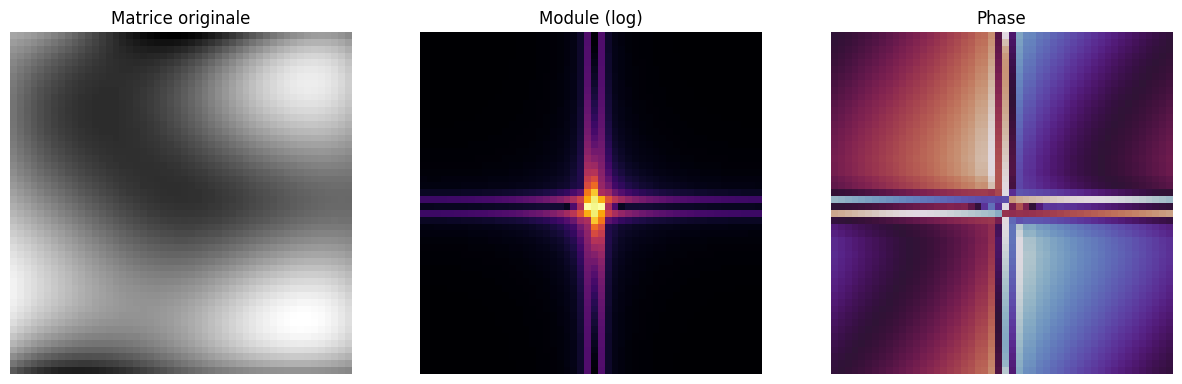

In [11]:
import numpy as np
import matplotlib.pyplot as plt

h = [[ 0.02439906, -0.14774486, -0.26901716, -0.08239703, -0.02134323],
     [-0.06463236, -0.19133082, -0.12083958,  0.05277538,  0.0563964 ],
     [ 0.0339999 , -0.11513419, -0.18441156, -0.13106574, -0.08351411],
     [ 0.16250205,  0.02085505, -0.0163816 ,  0.09919927,  0.09063622],
     [-0.11129033, -0.21099295, -0.09787389, -0.01417794, -0.02989437]]

h = np.array(h)
_,_,h = interpolate_filter(h) # petit rectangle blanc
# Transformée de Fourier 2D
F = np.fft.fft2(h)
F_shifted = np.fft.fftshift(F)  # déplace les basses fréquences au centre

# Calcul module et phase
magnitude = np.abs(F_shifted)
phase = np.angle(F_shifted)

# Passage en log pour visualiser plus clairement les magnitudes
magnitude_log = np.log1p(magnitude)

# Affichage
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(h, cmap='gray')
axs[0].set_title("Matrice originale")
axs[0].axis("off")

axs[1].imshow(magnitude_log, cmap='inferno')
axs[1].set_title("Module (log)")
axs[1].axis("off")

axs[2].imshow(phase, cmap='twilight')
axs[2].set_title("Phase")
axs[2].axis("off")

plt.show()


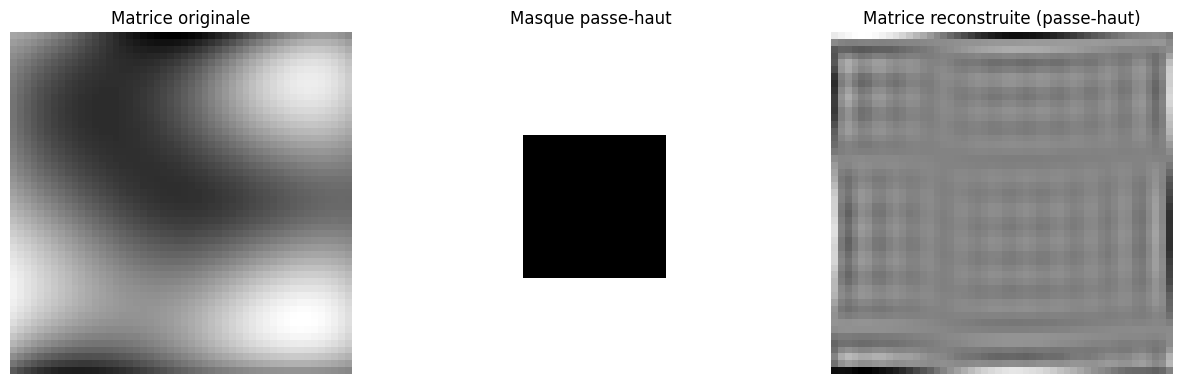

In [17]:
import numpy as np
import matplotlib.pyplot as plt


# FFT 2D et recentrage
F = np.fft.fft2(h)
F_shifted = np.fft.fftshift(F)

# Création d'un filtre passe-haut (cercle)
rows, cols = h.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols))
r = 10 # rayon de la zone basse fréquence à couper
mask[crow-r:crow+r+1, ccol-r:ccol+r+1] = 0

# Application du masque sur le module
F_hp = F_shifted * mask

# Retour dans le domaine spatial
F_ishift = np.fft.ifftshift(F_hp)
h_recon = np.fft.ifft2(F_ishift).real

# Affichage
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(h, cmap='gray')
axs[0].set_title("Matrice originale")
axs[0].axis("off")

axs[1].imshow(mask, cmap='gray')
axs[1].set_title("Masque passe-haut")
axs[1].axis("off")

axs[2].imshow(h_recon, cmap='gray')
axs[2].set_title("Matrice reconstruite (passe-haut)")
axs[2].axis("off")

plt.show()


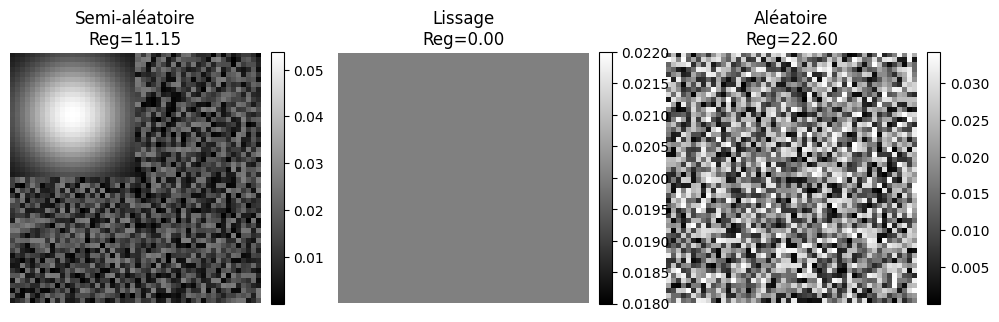

In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

def normalize_l2(h):
    return h / np.linalg.norm(h)

def normalize_sum(h):
    return h / np.sum(h)

def interpolate_filter(filter_weights, smooth_factor=50):
    """Interpolation cubique bilinéaire pour passer du filtre discret à une fonction continue"""
    h, w = filter_weights.shape
    y = np.arange(h)
    x = np.arange(w)
    interp_func = RegularGridInterpolator((y, x), filter_weights, method='cubic')
    ynew = np.linspace(0, h-1, smooth_factor)
    xnew = np.linspace(0, w-1, smooth_factor)
    X, Y = np.meshgrid(xnew, ynew)
    points = np.array([Y.ravel(), X.ravel()]).T
    Zsmooth = interp_func(points).reshape(smooth_factor, smooth_factor)
    return Zsmooth

def regularity_fourier(h, alpha=4):
    """
    Calcule la régularité d'un filtre 2D h[n,m] via sa transformée de Fourier.
    """
    H = np.fft.fft2(h)
    H = np.fft.fftshift(H)  # recentrer les basses fréquences
    
    n, m = h.shape
    u = np.fft.fftshift(np.fft.fftfreq(n))
    v = np.fft.fftshift(np.fft.fftfreq(m))
    U, V = np.meshgrid(u, v, indexing='ij')
    
    freq_weight = (U**2 + V**2)**(alpha/2)
    reg = np.sum(freq_weight * np.abs(H)**2)
    return reg

def semi_random_filter(size=50, sigma=5):
    """
    Crée un filtre semi-aléatoire :
    - Quart supérieur gauche = gaussienne
    - Autres quarts = bruit aléatoire
    """
    filt = np.random.rand(size, size) * 0.5  # base aléatoire faible
    
    # coordonnées
    x = np.arange(size//2)
    y = np.arange(size//2)
    X, Y = np.meshgrid(x, y)
    
    # gaussienne centrée sur le quart supérieur gauche
    gauss = np.exp(-((X - size//4)**2 + (Y - size//4)**2) / (2*sigma**2))
    
    # insérer la gaussienne dans le quart supérieur gauche
    filt[:size//2, :size//2] = gauss
    
    return filt

# Génération du filtre semi-aléatoire
semi_random = semi_random_filter(size=50, sigma=8)

# Normalisation
filters = {
    "Semi-aléatoire": normalize_l2(semi_random),
    "Lissage": normalize_l2(np.ones((50,50))),
    "Aléatoire": normalize_l2(np.random.rand(50,50))
}

# Calcul des régularités
regularities = {name: regularity_fourier(h) for name, h in filters.items()}

# Affichage
fig, axes = plt.subplots(1, len(filters), figsize=(12,4))
for ax, (name, h) in zip(axes, filters.items()):
    im = ax.imshow(h, cmap='gray', interpolation='nearest')
    ax.set_title(f"{name}\nReg={regularities[name]:.2f}")
    ax.axis('off')
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.show()
